### Uppgifter
Alla grafer ska exporteras till en undermapp som heter visualiseringar i ditt repo för labben. Exportera
matplotlib/seaborngrafer i png-format och plotly-grafer som html-filer. Ge relevanta namn till dina filer så det blir lätt att
referera till dem. Notera att du behöver ställa in bakgrundsfärg när du sparar matplotlibgrafer, annars blir de
transparenta och svåra att läsa.
Tänk på data storytelling, graferna du skapar ska ha lämpliga rubriker, labels, annoteringar, clutter ska tas bort, jobba
med attention mha färger mm

## Uppgift 0 - uppvärmning med riket
I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn


### Reads files and sheets. Renames columns and prints first sheet "Engelska"

In [68]:
# A) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på respektive dataframe så du får något liknande som nedan.

import pandas as pd

# Read the file and all different sheets
df_riks_2023 = pd.read_excel("../Labb2/data/riket2023_åk9_np.xlsx", sheet_name=None, skiprows=8)

sheets_to_change = ["Engelska", "Matematik", "Svenska", "Svenska som andraspråk", "Rapportbeskrivning och def."]

# Function to change the columnnames in all sheets
def change_columns(df):
    df.columns = ["Plats", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (poäng)", "Flickor (poäng)", "Pojkar (poäng)"][:len(df.columns)]
    return df

# Loopas through each sheet and changes the columnnames if the sheet is in sheets_to_change
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_riks_2023["Engelska"]


,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106941,51864,55077,97.0,97.1,97.0,15.7,15.8,15.7
1,Riket,Kommunal,84310,40675,43635,96.6,96.6,96.6,15.4,15.5,15.4
2,Riket,Enskild,22582,11165,11417,98.7,98.8,98.7,16.9,17.0,16.8
3,Riket,Skolverket,49,24,25,100.0,100.0,100.0,18.5,18.9,18.2


In [69]:
# A)
### Testing if more than the first sheet can be printed

df_math = df_riks_2023["Matematik"]

df_math

,Plats,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (poäng),Flickor (poäng),Pojkar (poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


## Takes the math sheet to calculate what percentage of girls and boys who got an F in math. 
### Takes A-E splits by 100 to get the percentage then takes A-F times 1 - the percentage.

In [70]:
# B)

# Extracts number of girls with grades A-F
girls_A_F = df_riks_2023["Matematik"].loc[0, "Flickor (A-F)"]
#Extracts the percentage of girls with grades A-E and converts it to a decimal
girls_A_E = df_riks_2023["Matematik"].loc[0, "Flickor (A-E)"] / 100  
# Calculates the number of girls with F-grade by subtracting the percentage of girls with grades A to E from 1 and multiplying by the total number of girls with grades A to F
girls_F = girls_A_F * (1 - girls_A_E)
rounded_girls_F =round(girls_F)

print("Antal flickor som fått betyget F:", rounded_girls_F)


boys_A_F = df_riks_2023["Matematik"].loc[0, "Pojkar (A-F)"]
boys_A_E = df_riks_2023["Matematik"].loc[0, "Pojkar (A-E)"] / 100
boys_F = boys_A_F * (1 - boys_A_E)
rounded_boys_F =round(boys_F)

print("Antal pojkar som fått betyget F:", rounded_boys_F)

Antal flickor som fått betyget F: 5825
Antal pojkar som fått betyget F: 5798


### Does the same as above but this is hardcoded with the percentage from the start.

In [71]:
# B)

# Total number of girls with F in math
girls_F = (pd.to_numeric(df_riks_2023["Matematik"]["Flickor (A-F)"]) * 0.113)
print("Totalt antal flickor som fått F:", round(girls_F[0]))

# Total number of boys with F in math
boys_F = (pd.to_numeric(df_riks_2023["Matematik"]["Pojkar (A-F)"]) * 0.105)
print("Totalt antal killar som fått F:", round(boys_F[0]))


Totalt antal flickor som fått F: 5825
Totalt antal killar som fått F: 5798


### Checks the subject for the total score and prints out a matplot graph.

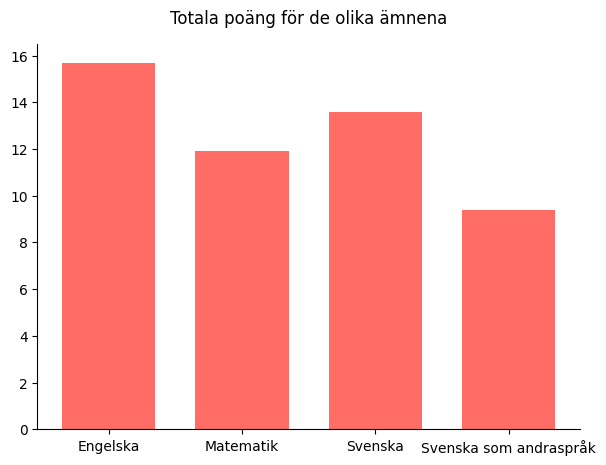

In [72]:
# C) Rita ett stapeldiagram på totala poängen för de olika ämnena.

import matplotlib.pyplot as plt

# Loops through each sheet and changes the columnnames as above
for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

# Creates a DataFrame with the total points for each subject
df_total_points = pd.DataFrame([
    {"Ämne": sheet_name, "Totalt poäng": pd.to_numeric(df.loc[0]["Totalt (poäng)"], errors="coerce")}
    for sheet_name, df in df_riks_2023.items() if sheet_name in sheets_to_change and "Totalt (poäng)" in df.columns])

# Skips/cleans possible NaN-values
df_total_points.dropna(inplace=True)

# draws the graf
fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(df_total_points["Ämne"], df_total_points["Totalt poäng"], color="#FF6D66", width=0.7, align='center')
ax.set_title("Totala poäng för de olika ämnena", pad=15)

# Removes the top and right axel-line
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Changes the labels on the x axel so they fit
plt.xticks(ha="center", fontsize=10)

plt.show()


### Gets the total score of each subject per "Huvudman" and puts it in a subplot with diferent colors for easier distinction.

C:\Users\Sandra\AppData\Local\Temp\ipykernel_35976\2028522769.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



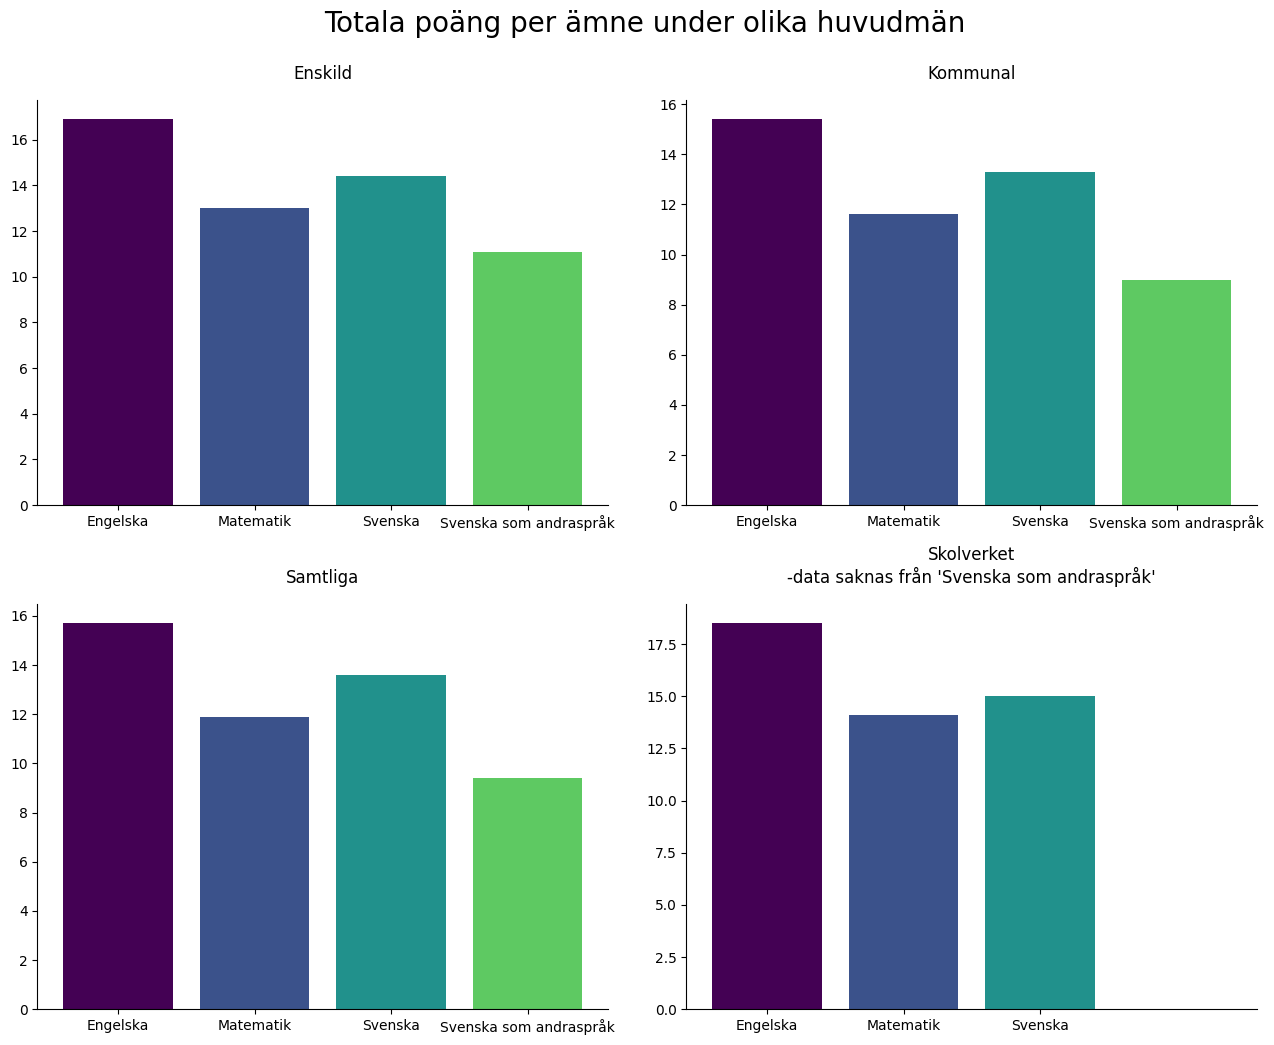

In [73]:
# D) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

for sheet_name, df in df_riks_2023.items():
    if sheet_name in sheets_to_change:
        df_riks_2023[sheet_name] = change_columns(df)

df_total_points = pd.DataFrame(columns=["Huvudman", "Ämne", "Totalt poäng"])

# Loops through each sheet and collects the total points for each subject and "huvudman"
for sheet_name in sheets_to_change:
    for huvudman in df_riks_2023[sheet_name]["Huvudman"].unique():
        if "Totalt (poäng)" in df_riks_2023[sheet_name].columns:
            total_points = pd.to_numeric(df_riks_2023[sheet_name][df_riks_2023[sheet_name]["Huvudman"] == huvudman]["Totalt (poäng)"], errors="coerce").sum(axis=0)
            df_total_points = pd.concat([df_total_points, pd.DataFrame({"Huvudman": [huvudman], "Ämne": [sheet_name], "Totalt poäng": [total_points]})])

df_total_points.dropna(inplace=True)

# Creates subplots and changes the size of the graf
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

# Loops through each "huvudman" and draws a bargraf in respective subplot-graf
for i, (huvudman, group) in enumerate(df_total_points.groupby("Huvudman")):
    # Indexing the axs matris to get the specifik axel (subplot) on position (row, column) in the grid.
    ax = axs[i // 2, i % 2] 
    cmap = plt.get_cmap("viridis")
    colors = [cmap(i/len(group["Ämne"])) for i in range(len(group["Ämne"]))]        

    bar_width = 0.8

    ax.bar(group["Ämne"], group["Totalt poäng"], color=colors, width=bar_width)
    ax.set_title(f"{huvudman}", pad=15)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Adjust x-label
    ax.set_xticks(range(len(group["Ämne"])))
    ax.set_xticklabels(group["Ämne"], ha="center", rotation_mode="anchor", fontsize=10)

    if huvudman == "Skolverket" or sheet_name == "Svenska som andraspråk":
            ax.set_title(f"{huvudman}\n-data saknas från 'Svenska som andraspråk'", pad=15)
            # Removes x-axel-ticks and labels for the last bar
            ax.set_xticks([0,1,2])

# Adjust the layout to avoid overlapp in the graf
plt.tight_layout()
plt.suptitle("Totala poäng per ämne under olika huvudmän", size=20, y=1.04)
plt.show()


### Diskussion 0D
- Här hade jag stora problem att få bort fjärde stapeln i sista grafen på grund av att matplot anpassar grafen utefter hur många staplar det finns. Oavsett om jag hårdkodar stapelbredden. 
    
    Använde till slut en if-sats för att specificera att i just skolverkets rad hoppa över "Svenska som andraspråk" med label och tick. Staplen är ändå tom då den saknar data.

### Uppgift 1 - uppvärmning betyg och prov
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  - a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.
  - b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.
  - c) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

### Reads new file and sheet, renames columns and prints to se that it works.

In [74]:
#A ) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt, flickor och pojkar.

# Reads data from both tabels in betyg och prov document
df_grades_1B = pd.read_excel("../Labb2/data/betyg_o_prov_riksnivå.xlsx", sheet_name="Tabell 1B")

# reads row 7-12 in Tabell_1B
data_1B = df_grades_1B.iloc[7:12]

b_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]

data_1B.columns = b_columns

display(data_1B)

,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
7,2018/19,221.7,234.3,209.8,229.8,243.3,217,24.5,21.7,27.2
8,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
9,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
10,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
11,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28


### Prints out specific columns to make debugging easier

In [75]:
# A)

# % students without G or a grade at all
total_F = (data_1B["% Som saknar godkänt: Totalt"])
print("Totalt antal som saknar godkänt:\n", round(total_F))

girls_F_grade = (data_1B["% Som saknar godkänt: Flickor"])
print("Totalt antal flickor som saknar godkänt:\n", round(girls_F_grade))

boys_F_grade = (data_1B["% Som saknar godkänt: Pojkar"])
print("Totalt antal pojkar som saknar godkänt:\n", round(boys_F_grade))

Totalt antal som saknar godkänt:
 7     24.5
8     23.9
9     23.9
10    25.9
11    26.8
Name: % Som saknar godkänt: Totalt, dtype: object
Totalt antal flickor som saknar godkänt:
 7     21.7
8     21.4
9     21.9
10    24.2
11    25.5
Name: % Som saknar godkänt: Flickor, dtype: object
Totalt antal pojkar som saknar godkänt:
 7     27.2
8     26.3
9     25.9
10    27.5
11      28
Name: % Som saknar godkänt: Pojkar, dtype: object


### Testing the plotfunction with my data

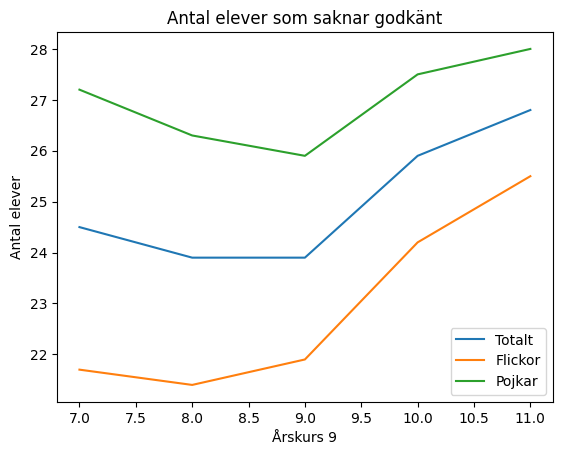

In [76]:
# A)

# Draws the linediagram
plt.plot(total_F, label="Totalt")
plt.plot(girls_F_grade, label="Flickor")
plt.plot(boys_F_grade, label="Pojkar")

# adjusts the labels
plt.title("Antal elever som saknar godkänt")
plt.xlabel("Årskurs 9")
plt.ylabel("Antal elever")
plt.legend()

plt.show()

### Same principle as above but making the design more readable and nice.

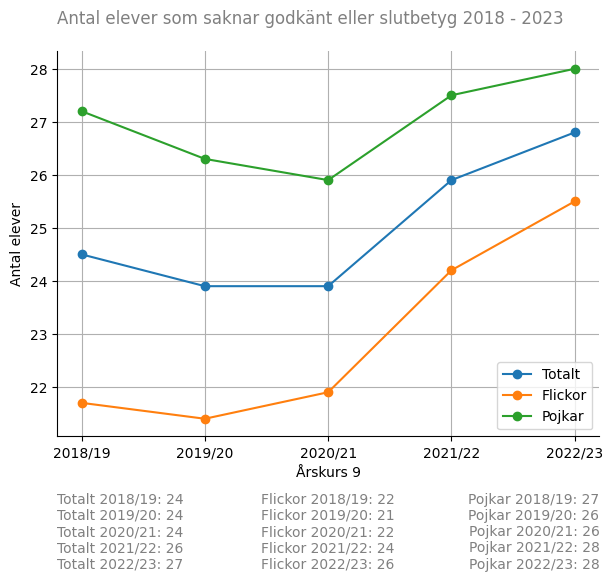

In [77]:
# A) 

years = data_1B["Läsår"]

# % of students without G or a grade at all. as above
total_F = (data_1B["% Som saknar godkänt: Totalt"])
girls_F_grade = (data_1B["% Som saknar godkänt: Flickor"])
boys_F_grade = (data_1B["% Som saknar godkänt: Pojkar"])

# Creates subplots and size
fig, ax = plt.subplots(figsize=(7, 5))

# Draws lines and plots dots based on years
plt.plot(years, total_F, label="Totalt", marker="o")
plt.plot(years, girls_F_grade, label="Flickor", marker="o")
plt.plot(years, boys_F_grade, label="Pojkar", marker="o")

# Adjusts labels and gives space between top label and the graf and places it to the left
plt.title("Antal elever som saknar godkänt eller slutbetyg 2018 - 2023", pad=20, color="gray", loc="left")
plt.xlabel("Årskurs 9")
plt.ylabel("Antal elever")

# Gives the graf a grid
plt.grid(True)
plt.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adds three lists at the bottom with year, who and sum for more clarity
plt.text(0.0, -0.35, "\n".join([f"Totalt {year}: {round(val)}" for val, year in zip(total_F, years)]), transform=plt.gca().transAxes, ha="left", va="bottom", color="gray")
plt.text(0.5, -0.35, "\n".join([f"Flickor {year}: {round(val)}" for val, year in zip(girls_F_grade, years)]), transform=plt.gca().transAxes, ha="center", va="bottom", color="gray")
plt.text(1.0, -0.35, "\n".join([f"Pojkar {year}: {round(val)}" for val, year in zip(boys_F_grade, years)]), transform=plt.gca().transAxes, ha="right", va="bottom", color="gray")

plt.show()


### Same graph but in PLOTLY. Now with better design and decluttered. Presenting data in a in a better cleaner way

In [78]:
# A) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt, flickor och pojkar i samma graf.

years = data_1B["Läsår"]
import plotly.express as px
import plotly.graph_objects as go

# Creates a new DataFrame for Plotly
df_plotly = pd.DataFrame({
    "Year": years,
    "Totalt": total_F.tolist(),
    "Flickor": girls_F_grade.tolist(),
    "Pojkar": boys_F_grade.tolist()})

# Plotly Express line plot
fig = px.line(df_plotly, x="Year", y=["Totalt", "Flickor", "Pojkar"], markers=True)

fig.update_layout(
    title={
        "text": "Andel elever i åk 9 som saknar godkänt eller slutbetyg 2018 - 2023<br>"
                "- Flickor har högst ökning av saknat slutbetyg med en ökning på 3,8%",
        # Adjusts text and changes the vertical position of the title
        "y": 0.95,
        # Adjusts text and changes the horisontal position of the title
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 20})

# Adds legend
fig.update_layout(showlegend=True)
fig.update_layout(plot_bgcolor="white", paper_bgcolor="white")

# Removes top- and right axis
fig.update_layout(xaxis=dict(showline=True, showgrid=False, linecolor="Lightgray", linewidth=1, title_text=""),
                  yaxis=dict(showline=True, showgrid=False, linecolor="Lightgray", linewidth=1, title_text=""))

# Inspo from plotly.com
fig.add_shape(
    type="line", line_color="gray", line_width=3, opacity=0.5, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=21.50, y1=25.76, yref="y")
# adds text with an arrow
fig.add_annotation(text="Ökning med 3.8%", x="2022/23", y=25.4, arrowhead=1, showarrow=True)

fig.update_layout(height=600, width=1000)
fig.update_layout(font=dict(size=14))
#fig.write_html("Plotly_1_a.html")

fig.show()

### Makes matplot out of meanvalue for 16 subjects and makes a nice graph.

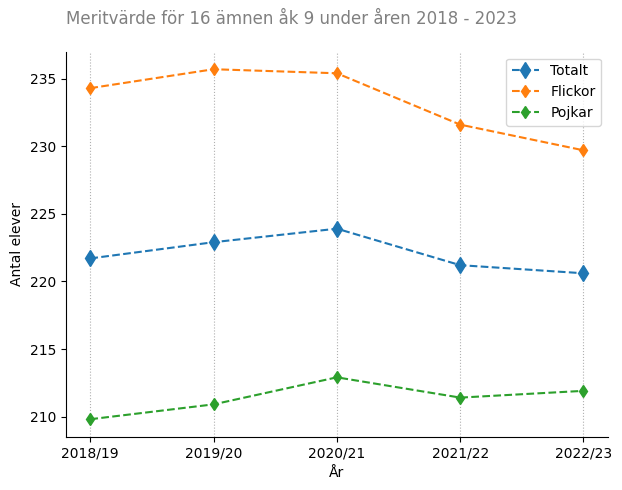

In [79]:
# B) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23.

years = data_1B["Läsår"]

# Sets mean value of total, girls and boys to variables.
mean_T = (data_1B["Medelvärde 16 ämnen: Totalt"])
mean_G = (data_1B["Medelvärde 16 ämnen: Flickor"])
Mean_B = (data_1B["Medelvärde 16 ämnen: Pojkar"])

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(years, mean_T, label="Totalt", marker="d", ms=8, ls="--")
ax.plot(years, mean_G, label="Flickor", marker="d", ls="--")
ax.plot(years, Mean_B, label="Pojkar", marker="d", ls="--")

# Renames labels and gives space at top. Places toplabel to the left
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023", pad=20, color="gray", loc="left")
plt.xlabel("År")
plt.ylabel("Antal elever")

# Gives the graf a grid on x-axis with dotted lines
plt.grid(axis= "x", ls = ':', linewidth = 0.8)
plt.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# fig.savefig("name.png")

plt.show()

### Same graph as above but made with plotly. Looks nicer and cleaner

In [80]:
# B) 

# Creates a new DataFrame
df_plotly_2 = pd.DataFrame({
    "Year": years,
    "Totalt": mean_T.tolist(),
    "Flickor": mean_G.tolist(),
    "Pojkar": Mean_B.tolist()})

fig_2 = px.line(df_plotly_2, x="Year", y=["Totalt", "Flickor", "Pojkar"], markers=True, title="Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023")

# Adjusts axel descriptions
fig_2.update_layout(xaxis_title="", yaxis_title="")

# Adds legend with description of whats what
fig_2.update_layout(showlegend=True)

# Adds grid
fig_2.update_layout(xaxis=dict(showgrid=True, gridwidth=1, gridcolor="LightGray"),
                   yaxis=dict(showgrid=True, gridwidth=1, gridcolor="LightGray"))

# Removes top and right line
fig_2.update_layout(xaxis=dict(showline=True, showgrid=False, linecolor="Lightgray", linewidth=1),
                    yaxis=dict(showline=True, showgrid=False, linecolor="Lightgray", linewidth=1))

# Updates to change fig size
fig_2.update_layout(height=600, width=1000)
fig_2.update_layout(legend=dict(font=dict(size=14)))

# Adds values for girls line 
for trace in fig_2.data:
    if "Flickor" in trace.name:
        trace.update(mode="markers+lines+text", textposition="top center", text=trace.y)
        punkt_3 = trace.y[2]
        punkt_5 = trace.y[4]
    else:
        # No text/values on the other lines
        trace.update(mode="markers+lines")

fig_2.update_layout(
    title={
        "text": "Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023<br>"
                "- Mätdatan visar att meritvärdet för flickor har störst förändring mellan år 20/21 och 22/23",
        # Adjusts text and changes the vertical position of the title
        "y": 0.95,
        # Adjusts text and changes the horisontal position of the title
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 18})

# add a text callout with arrow
fig_2.add_annotation(text="Sänkning med 5,7", x="2022/23", y=232, arrowhead=2, showarrow=True, standoff=5)
fig_2.update_layout(plot_bgcolor="white", paper_bgcolor="white")

#fig_2.write_html("Plotly_1b.html")
fig_2.show()

### 1_c does the same as previous similar codeblock. Take rows 29 to 32 and renames the columns

In [81]:
# C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
#    läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund. Rita lämpliga grafer

# Reads from df_grades_1B and locates row 29 to 32 and makes it a variable
data_parents = df_grades_1B.iloc[29:32]

# Renames the columns
b2_columns = [
    "Läsår",
    "Medelvärde 16 ämnen: Totalt",
    "Medelvärde 16 ämnen: Flickor",
    "Medelvärde 16 ämnen: Pojkar",
    "Medelvärde 17 ämnen: Totalt",
    "Medelvärde 17 ämnen: Flickor",
    "Medelvärde 17 ämnen: Pojkar",
    "% Som saknar godkänt: Totalt",
    "% Som saknar godkänt: Flickor",
    "% Som saknar godkänt: Pojkar"
]
data_parents.columns = b2_columns

# Displays data_parents to double check it works
display(data_parents)

,Läsår,Medelvärde 16 ämnen: Totalt,Medelvärde 16 ämnen: Flickor,Medelvärde 16 ämnen: Pojkar,Medelvärde 17 ämnen: Totalt,Medelvärde 17 ämnen: Flickor,Medelvärde 17 ämnen: Pojkar,% Som saknar godkänt: Totalt,% Som saknar godkänt: Flickor,% Som saknar godkänt: Pojkar
29,Förgymnasial utbildning,163.8,172.2,155.8,166.8,175.6,158.3,63.5,61.5,65.3
30,Gymnasial utbildning,197.4,207.2,188.2,203.2,213.6,193.3,37.4,35.2,39.5
31,Eftergymnasial utbildning,239.1,247.9,230.7,248.6,258.1,239.6,16.8,16.1,17.5


In [82]:
# C)

# Counts mean value for each gender and total
parents_T = data_parents["Medelvärde 16 ämnen: Totalt"]
parents_F = data_parents["Medelvärde 16 ämnen: Flickor"]
parents_P = data_parents["Medelvärde 16 ämnen: Pojkar"]

# Counts % value for each gender and total
missing_percent_T = data_parents["% Som saknar godkänt: Totalt"]
missing_percent_F = data_parents["% Som saknar godkänt: Flickor"]
missing_percent_P = data_parents["% Som saknar godkänt: Pojkar"]

# Prints to check result
print(parents_T)
print(parents_F)
print(parents_P)

29    163.8
30    197.4
31    239.1
Name: Medelvärde 16 ämnen: Totalt, dtype: object
29    172.2
30    207.2
31    247.9
Name: Medelvärde 16 ämnen: Flickor, dtype: object
29    155.8
30    188.2
31    230.7
Name: Medelvärde 16 ämnen: Pojkar, dtype: object


In [83]:
# C)

# Converts columns to numeric values
parents_T_numeric = pd.to_numeric(parents_T)
parents_F_numeric = pd.to_numeric(parents_F)
parents_P_numeric = pd.to_numeric(parents_P)

missing_T_numeric = pd.to_numeric(missing_percent_T)
missing_F_numeric = pd.to_numeric(missing_percent_F)
missing_P_numeric = pd.to_numeric(missing_percent_P)

# Prints to check result
print(parents_T_numeric)
print(parents_F_numeric)
print(parents_P_numeric)

29    163.8
30    197.4
31    239.1
Name: Medelvärde 16 ämnen: Totalt, dtype: float64
29    172.2
30    207.2
31    247.9
Name: Medelvärde 16 ämnen: Flickor, dtype: float64
29    155.8
30    188.2
31    230.7
Name: Medelvärde 16 ämnen: Pojkar, dtype: float64


### Calculation to make sure there's space between bars

In [84]:
# C)

import numpy as np

# Width on each bar
bar_width = 0.2

# Creates lists for x-values
x_values_totalt = np.arange(len(parents_T_numeric))
x_values_flickor = x_values_totalt + bar_width
x_values_pojkar = x_values_totalt + 2 * bar_width

# Prints to check result
print(x_values_totalt)
print(x_values_flickor)
print(x_values_pojkar)

[0 1 2]
[0.2 1.2 2.2]
[0.4 1.4 2.4]


## Draws bardiagrams for each gender and educationlevel with the converted num values. Gives it a label, color and the bar width from above. 
### Testing to see if it prints for debugging.

<BarContainer object of 3 artists>

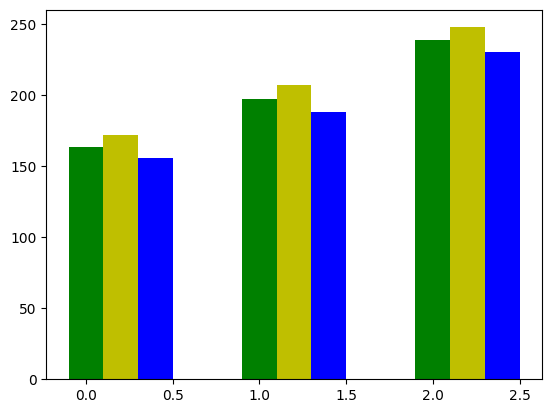

In [85]:
# C)

plt.bar(x_values_totalt, parents_T_numeric, label="Meritvärde: Totalt", color="g", width=bar_width)
plt.bar(x_values_flickor, parents_F_numeric, label="Meritvärde: Flickor", color="y", width=bar_width)
plt.bar(x_values_pojkar, parents_P_numeric, label="Meritvärde: Pojkar", color="b", width=bar_width)

In [86]:
# C)
# Prints to check result
print(data_parents.index)

RangeIndex(start=29, stop=32, step=1)


### Next step in matplot to test design and that everything works

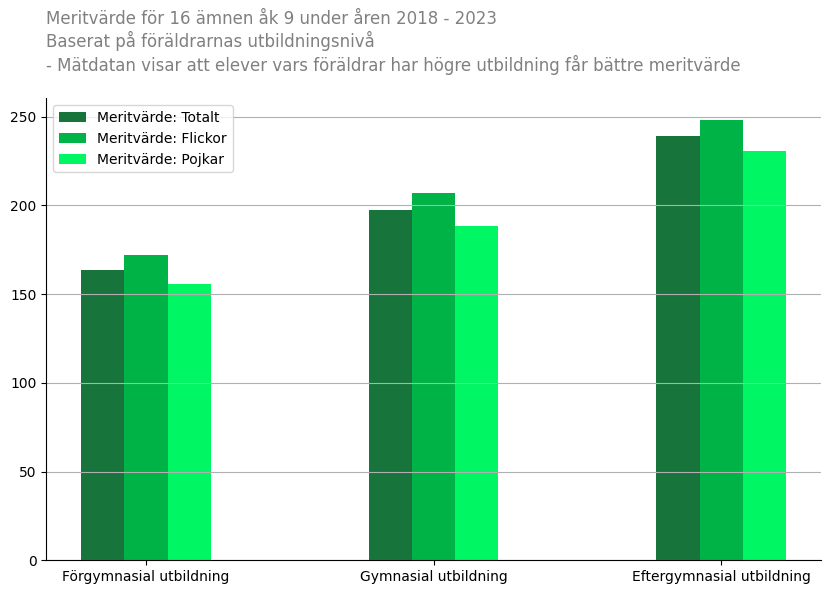

In [87]:
# C) Undersök nu andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data finns för
# läsår 22/23. Exempel kan man undersöka föräldrarnas utbildningsbakgrund.

fig, ax = plt.subplots(figsize=(10, 6))

# Width of bars
bar_width = 0.15

x_values_totalt = np.arange(len(parents_T_numeric))
x_values_flickor = x_values_totalt + bar_width
x_values_pojkar = x_values_totalt + 2 * bar_width

plt.bar(x_values_totalt, parents_T_numeric, label="Meritvärde: Totalt", color="#17753C", width=bar_width)
plt.bar(x_values_flickor, parents_F_numeric, label="Meritvärde: Flickor", color="#00B347", width=bar_width)
plt.bar(x_values_pojkar, parents_P_numeric, label="Meritvärde: Pojkar", color="#00F663", width=bar_width)



# Adjusts labels and gives space between top label and the graf and places it to the left
plt.title("Meritvärde för 16 ämnen åk 9 under åren 2018 - 2023\nBaserat på föräldrarnas utbildningsnivå\n- Mätdatan visar att elever vars föräldrar har högre utbildning får bättre meritvärde", pad=20, color="gray", loc="left")

# Use year/educationlevel as x-axel tick positions
group_labels = ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"]
plt.xticks(x_values_totalt + bar_width, group_labels)

plt.grid(axis="y")
plt.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

### Checking design and taking in the % without a grade-data. 

In [88]:
# C)

# Creating a DataFrame
df_plotly_3 = pd.DataFrame({
    "Education Level": ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"],
    "Meritvärde: Totalt": parents_T_numeric.tolist(),
    "Meritvärde: Flickor": parents_F_numeric.tolist(),
    "Meritvärde: Pojkar": parents_P_numeric.tolist(),
    "% Som saknar godkänt: Totalt": missing_percent_T.tolist(),
    "% Som saknar godkänt: Flickor": missing_percent_F.tolist(),
    "% Som saknar godkänt: Pojkar": missing_percent_P.tolist()
})

# 'Melting' the DataFrame so that the bars are next to each other
df_plotly_melted = pd.melt(df_plotly_3, id_vars=["Education Level"], var_name="Category", value_name="Value")

# Gives names to labels and changes colors of the bars 
fig = px.bar(df_plotly_melted, x="Education Level", y="Value", color="Category",
             color_discrete_sequence=["#17753C", "#00B347", "#00F663", "orange", "#FFA500", "#FFD700"],
             title=("Meritvärde för 16 ämnen åk 9 under åren 2023\nBaserat på föräldrarnas utbildningsnivå\n- Mätdatan visar att elever vars föräldrar har högre utbildning får bättre meritvärde"))

fig.update_layout(xaxis_title="Föräldrarnas utbildningsnivå")
fig.update_layout(showlegend=True)

# Fixes the title position and splits it into lines
fig.update_layout(
    title={
        "text": "Meritvärde för 16 ämnen åk 9 under åren 2023, baserat på föräldrarnas utbildningsnivå<br>"
                "- Mätdatan visar att elever vars föräldrar har högre utbildning får bättre meritvärde",
        # Adjusts text and changes the vertical position of the title
        "y": 0.95,
        # Adjusts text and changes the horizontal position of the title
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 20})

# Updates layout for x- and y-axis
fig.update_layout(xaxis=dict(showline=True, showgrid=False, gridwidth=1, gridcolor="LightGray", linecolor="Lightgray", linewidth=1),
                  yaxis=dict(showline=True, showgrid=True, gridwidth=1, gridcolor="LightGray", linecolor="Lightgray", linewidth=1))

# Groups bars, sets grafsize and background color
fig.update_layout(barmode="group", 
                  height=600, 
                  width=1000, 
                  plot_bgcolor="white", 
                  paper_bgcolor="white", 
                  font=dict(size=16))

#fig.write_html("Plotly_1c_v1.html")

fig.show()


## Undersöker andra variabler, och hur de påverkar meritvärde och andel med minst ett saknat betyg. Data är för läsår 22/23. Här undersöks föräldrarnas utbildningsbakgrund.

### Same as the graph above but in plotly with better design and decluttered in a subplot to easier see the results. 
### Colors to make sure everything is distinct and easily readable.

In [89]:
# C)

from plotly.subplots import make_subplots

# Creating a DataFrame for Meritvärde
df_merit = pd.DataFrame({
    "Education Level": ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"],
    "Totalt": parents_T_numeric.tolist(),
    "Flickor": parents_F_numeric.tolist(),
    "Pojkar": parents_P_numeric.tolist()})

# Melting DataFrame so that the bars are next to each other for Meritvärde
df_merit_melted = pd.melt(df_merit, id_vars=["Education Level"], var_name="Category", value_name="Meritvärde")

# Creating a DataFrame for % Som saknar godkänt
df_missing = pd.DataFrame({
    "Education Level": ["Förgymnasial utbildning", "Gymnasial utbildning", "Eftergymnasial utbildning"],
    "Totalt": missing_percent_T.tolist(),
    "Flickor": missing_percent_F.tolist(),
    "Pojkar": missing_percent_P.tolist()})

# Melting DataFrame so that the bars are next to each other for % Som saknar godkänt
df_missing_melted = pd.melt(df_missing, id_vars=["Education Level"], var_name="Category", value_name="Missing")

# Creating subplots
fig = make_subplots(rows=2, cols=1, subplot_titles=("Meritvärde för 16 ämnen åk 9", "% Som saknar godkänt för 16 ämnen åk 9"), vertical_spacing=0.08)

# Adding traces for Meritvärde subplot
fig.add_trace(
    go.Bar(x=df_merit_melted[df_merit_melted["Category"] == "Totalt"]["Education Level"], 
           y=df_merit_melted[df_merit_melted["Category"] == "Totalt"]["Meritvärde"], 
           name="Totalt", marker_color="#4A0075", showlegend=True, legendgroup="merit"), row=1, col=1)

fig.add_trace(
    go.Bar(x=df_merit_melted[df_merit_melted["Category"] == "Flickor"]["Education Level"], 
           y=df_merit_melted[df_merit_melted["Category"] == "Flickor"]["Meritvärde"], 
           name="Flickor", marker_color="#9C00F6", showlegend=True, legendgroup="merit"), row=1, col=1)

fig.add_trace(
    go.Bar(x=df_merit_melted[df_merit_melted["Category"] == "Pojkar"]["Education Level"], 
           y=df_merit_melted[df_merit_melted["Category"] == "Pojkar"]["Meritvärde"], 
           name="Pojkar", marker_color="#7100B3", showlegend=True, legendgroup="merit"), row=1, col=1)

# Adding traces for % Som saknar godkänt subplot
fig.add_trace(
    go.Bar(x=df_missing_melted[df_missing_melted["Category"] == "Totalt"]["Education Level"], 
           y=df_missing_melted[df_missing_melted["Category"] == "Totalt"]["Missing"], 
           name="Totalt", marker_color="#A2F5BD", showlegend=True, legendgroup="missing"), row=2, col=1)

fig.add_trace(
    go.Bar(x=df_missing_melted[df_missing_melted["Category"] == "Flickor"]["Education Level"], 
           y=df_missing_melted[df_missing_melted["Category"] == "Flickor"]["Missing"], 
           name="Flickor", marker_color="#007049", showlegend=True, legendgroup="missing"), row=2, col=1)

fig.add_trace(
    go.Bar(x=df_missing_melted[df_missing_melted["Category"] == "Pojkar"]["Education Level"], 
           y=df_missing_melted[df_missing_melted["Category"] == "Pojkar"]["Missing"], 
           name="Pojkar", marker_color="#00B374", showlegend=True, legendgroup="missing"), row=2, col=1)


# Updating layout
fig.update_layout(height=1100, width=1200, showlegend=False)
fig.update_xaxes(row=1, col=1, tickangle=0, linecolor="Lightgray", linewidth=1)
fig.update_xaxes(row=2, col=1, tickangle=0, linecolor="Lightgray", linewidth=1)
fig.update_yaxes(row=1, col=1, linecolor="Lightgray", linewidth=1)
fig.update_yaxes(row=2, col=1, linecolor="Lightgray", linewidth=1)

fig.update_layout(
    title={
        "text": "<span style='color:blue'>Meritvärde och procent</span> baserat på föräldrarnas utbildningsnivå under 2022/23<br>"
                "- Mätdatan visar att elever vars föräldrar har högre utbildning<br>"
                "<span style='color:green'>bättre meritvärde</span> och högre grad <span style='color:green'>godkända</span> betyg.",
        # Adjusts text and changes the vertical position of the title
        "y": 0.95,
        # Adjusts text and changes the horizontal position of the title
        "x": 0.5,
        "xanchor": "center",
        "yanchor": "top",
        "font_size": 20},
        margin=dict(t=160))
        
fig.update_layout(legend=dict(tracegroupgap=150, y=0.5), plot_bgcolor="white", paper_bgcolor="white", font=dict(size=16), showlegend=True)

#fig.write_html("Plotly_1c_v2.html")

fig.show()


## Diskussion 1c

### Undersöker om föräldrarnas utbildningsbakgrund har någon påverkan på elevernas prestationer och betyg.

 - Datan visar att eleverna som har föräldrar med högre utbildningsnivå i regel få bättre betyg och i betydligt lägre grad saknar ett godkänt betyg eller. 

Jag tog först in datan och bröt ner koden i steg för att enklare kunna debugga. Skapade sedan en matplot graf och designade så man tydligare ser skillnad på staplarna via kontraster och färger som även skulle fungera i svartvitt.

Testade sedan att omvandla koden till plotly med subplots och tyckte det blev snyggare och mycket tydligare att läsa datan.

## Uppgift 2 - KPIer & EDA
Definiera 3-6 KPIer utöver de som använts i ovanstående uppgifter och gör explorativ dataanalys på en eller flera
dataset som ni får söka själva. Ni får inte ta dataseten som ni redan jobbat med i uppgift 0 och 1. Excel och eller csv-filer
kan ni hitta i skolverkets statistik
Se till att dokumentera vad du undersöker med markdown kombinerad med kod i Jupyter notebook eller om du
använder Pythonskript, skriv en markdown vid sidan om. Dokumentera också vad du kommer fram till och spara alla
visualiseringar.

1 - Genomsnittligt meritvärde för elever med föräldrar som jobbar inom skola:
- Genomsnittligt meritvärde för elever vars föräldrar arbetar inom skolverket.
- Här kollar vi om det finns något sammanhang mellan föräldrarnas yrke och elevernas prestationer.

2 - Andel flickor med minst ett saknat betyg:
- (Antal flickor med minst ett saknat betyg / Totalt antal flickor) * 100
- Ger en insikt i andelen flickor som har svårigheter att uppnå godkänt betyg i minst ett ämne.

3 - Andel elever som går vidare till högre utbildning:
- (Antal elever som går vidare till högre utbildning / Totalt antal elever som tog examen) * 100
- Här kan vi använda data för att mäta skolans framgång i att förbereda och motiverea elever för fortsatta studier.

4 - Andel elever som uppnår nationella standarder i alla ämnen:
- (Antal elever som uppnår nationella standarder i alla ämnen / Totalt antal elever) * 100
- Ger en indikation på skolans framgång i att uppfylla nationella standarder.

5 - Andel elever med förbättrat meritvärde från föregående år:
- (Antal elever med ökat meritvärde från föregående år / Totalt antal elever) * 100
- Här mäter vi eleverna i en särkskilld årskull (ex åk9) mot föregående år (åk9) och hur de akademiska framstegen ser ut över tid.
    Denna KPI testar jag här nedan.

## Här undersöks relationen vid prov och betyg mellan VT22 och VT23 för att se skillnaden i betyg mellan årskullar.

In [90]:
# 2)

# Reads file and sheets while skipping unnecessary rows
gymnasie_vt23 = pd.read_excel("../Labb2/data/Gymnasieskola_kursbetyg_o_kursprovsbetyg_VT23_Riket.xlsx", sheet_name=None, skiprows=8)
gymnasie_vt22 = pd.read_excel("../Labb2/data/Gymnasieskola_kursbetyg_o_kursprovsbetyg_VT22_Riket.xlsx", sheet_name=None, skiprows=8)

sheets_to_change2 = ["Engelska 5", "Engelska 6", "Matematik 1A", "Matematik 1B", "Matematik 2B", "Matematik 3B", "Matematik 3C", "Matematik 4", "Svenska 1", "Svenska 3", "Svenska som andraspråk 1", "Svenska som andraspråk 3", "Rapportbeskrivning och def."]

# Function to change columnnames in all sheets
def change_columns(df2):
    df2.columns = ["Riket", "Huvudman", "Antal elever som har både provbetyg och kursbetyg", "Andel lägre", "Andel lika", "Andel högre", "Antal kvinnor", "Andel lägre kvinnor", "Andel lika kvinnor", "Andel högre kvinnor", "Antal män", "Andel lägre män", "Andel lika män", "Andel högre män"][:len(df2.columns)]
    return df2

# Loops through each sheet and changescolumnnames if it's in sheets_to_change
for sheet_name, df2 in gymnasie_vt23.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt23[sheet_name] = change_columns(df2)

for sheet_name, df2 in gymnasie_vt22.items():
    if sheet_name in sheets_to_change2:
        gymnasie_vt22[sheet_name] = change_columns(df2)
        
# Prints the definition for clarity
print("Antal elever: Antal elever som har både provbetyg och kursbetyg\nAndel lägre: Lägre betyder att kursbetyget är ett eller flera betygssteg under provbetyget\nAndel lika: Lika, ingen avvikelse, betyder att eleven har fått samma kursbetyg som provbetyg"
      "\nAndel högre: Högre betyder att kursbetyget är ett eller flera betygssteg över provbetyget\nAntal kvinnor: Antal kvinnliga elever som har både provbetyg och kursbetyg\nAntal män: Antal manliga elever som har både provbetyg och kursbetyg")

display(gymnasie_vt23["Engelska 5"])
display(gymnasie_vt22["Engelska 5"])

Antal elever: Antal elever som har både provbetyg och kursbetyg
Andel lägre: Lägre betyder att kursbetyget är ett eller flera betygssteg under provbetyget
Andel lika: Lika, ingen avvikelse, betyder att eleven har fått samma kursbetyg som provbetyg
Andel högre: Högre betyder att kursbetyget är ett eller flera betygssteg över provbetyget
Antal kvinnor: Antal kvinnliga elever som har både provbetyg och kursbetyg
Antal män: Antal manliga elever som har både provbetyg och kursbetyg


,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,23197,10.6,73.8,15.6,9100,7.4,73.9,18.7,14097,12.6,73.7,13.6
1,Riket,Kommunal,15451,11.2,74.3,14.5,5768,8.0,74.5,17.5,9683,13.1,74.2,12.7
2,Riket,Enskild,7336,9.4,72.3,18.3,3094,6.3,72.3,21.3,4242,11.6,72.3,16.1
3,Riket,Region,410,9.5,79.8,10.7,238,7.1,78.6,14.3,172,12.8,81.4,5.8


,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,22813,11.5,69.7,18.8,8941,8.1,69.1,22.7,13872,13.7,70.0,16.3
1,Riket,Kommunal,14920,11.4,71.9,16.7,5485,7.8,71.3,20.8,9435,13.4,72.3,14.3
2,Riket,Enskild,7501,12.1,65.0,22.9,3217,8.9,65.3,25.7,4284,14.5,64.7,20.8
3,Riket,Region,392,5.9,72.4,21.7,239,4.6,69.9,25.5,153,7.8,76.5,15.7


In [91]:
# Display to check result
gymnasie_vt22["Engelska 5"].head()

,Riket,Huvudman,Antal elever som har både provbetyg och kursbetyg,Andel lägre,Andel lika,Andel högre,Antal kvinnor,Andel lägre kvinnor,Andel lika kvinnor,Andel högre kvinnor,Antal män,Andel lägre män,Andel lika män,Andel högre män
0,Riket,Samtliga,22813,11.5,69.7,18.8,8941,8.1,69.1,22.7,13872,13.7,70.0,16.3
1,Riket,Kommunal,14920,11.4,71.9,16.7,5485,7.8,71.3,20.8,9435,13.4,72.3,14.3
2,Riket,Enskild,7501,12.1,65.0,22.9,3217,8.9,65.3,25.7,4284,14.5,64.7,20.8
3,Riket,Region,392,5.9,72.4,21.7,239,4.6,69.9,25.5,153,7.8,76.5,15.7


In [92]:
# Checks columnnames in dataset
print(gymnasie_vt22["Engelska 5"].columns)

Index(['Riket', 'Huvudman',
       'Antal elever som har både provbetyg och kursbetyg', 'Andel lägre',
       'Andel lika', 'Andel högre', 'Antal kvinnor', 'Andel lägre kvinnor',
       'Andel lika kvinnor', 'Andel högre kvinnor', 'Antal män',
       'Andel lägre män', 'Andel lika män', 'Andel högre män'],
      dtype='object')


In [93]:
# Variabel for classyear
grades_A = gymnasie_vt22["Engelska 5"]
grades_B = gymnasie_vt23["Engelska 5"]

# Creates numpy-array for x-values
grades_A_np = np.arange(len(grades_A))
grades_B_np = np.arange(len(grades_B))

# Counts number students without G or a grade at all
grade_low_A = (grades_A["Andel lägre"])
grade_same_A = (grades_A["Andel lika"])
grade_high_A = (grades_A["Andel högre"])
grade_low_B = (grades_B["Andel lägre"])
grade_same_B = (grades_B["Andel lika"])
grade_high_B = (grades_B["Andel högre"])

display(grade_low_A)

0    11.5
1    11.4
2    12.1
3     5.9
Name: Andel lägre, dtype: float64

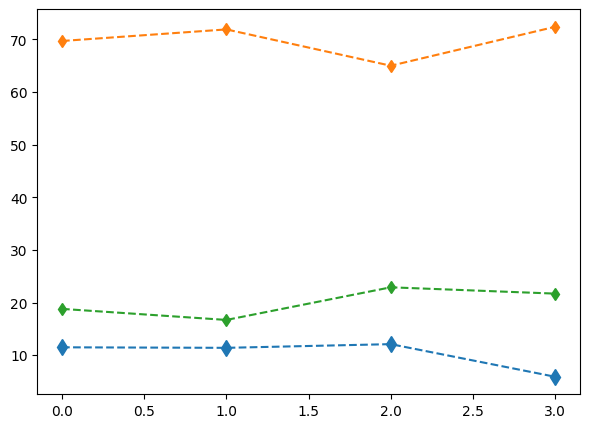

In [94]:
# Draws up a quick linegraph so data works in graph

fig, ax = plt.subplots(figsize=(7, 5))

plt.plot(grades_A_np, grade_low_A, label="Lägre", marker="d", ms=8, ls="--")
plt.plot(grades_A_np, grade_same_A, label="Samma", marker="d", ls="--")
plt.plot(grades_A_np, grade_high_A, label="Högre", marker="d", ls="--")

### Undersöker om elever i åk nio får högre, samma eller lägre betyg i snitt från år 2022 till 2023
- Cleans up design and testing data in matplot

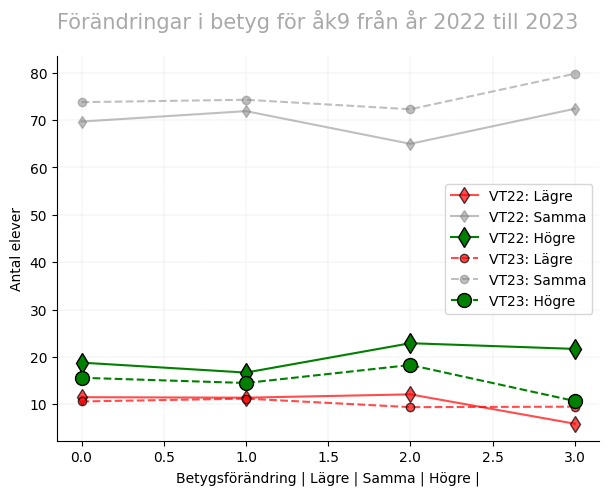

In [95]:
# 2.

grades_A = gymnasie_vt22["Engelska 5"]
grades_B = gymnasie_vt23["Engelska 5"]

# Creates variable where numpy aranges by length
grades_A_np = np.arange(len(grades_A))
grades_B_np = np.arange(len(grades_B))

# Checks the grade from tabel A to check value of lower, same and higher grader from VT22
grade_low_A = (grades_A["Andel lägre"])
grade_same_A = (grades_A["Andel lika"])
grade_high_A = (grades_A["Andel högre"])

# Checks the grade from tabel B to check value of lower, same and higher grader from VT23
grade_low_B = (grades_B["Andel lägre"])
grade_same_B = (grades_B["Andel lika"])
grade_high_B = (grades_B["Andel högre"])

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(grades_A_np, grade_low_A, label="VT22: Lägre", marker="d", ms=8, color="r", mec = "black", alpha=0.7)
ax.plot(grades_A_np, grade_same_A, label="VT22: Samma", marker="d", color="gray", alpha=0.5)
ax.plot(grades_A_np, grade_high_A, label="VT22: Högre", marker="d", ms=10, color="g", mec = "black")

ax.plot(grades_B_np, grade_low_B, label="VT23: Lägre", marker="o", ls="--", color="r", mec = "black", alpha=0.7)
ax.plot(grades_B_np, grade_same_B, label="VT23: Samma", marker="o", ls="--", color="gray", alpha=0.5)
ax.plot(grades_B_np, grade_high_B, label="VT23: Högre", marker="o", ms=10, ls="--", color="g", mec = "black")

plt.title("Förändringar i betyg för åk9 från år 2022 till 2023", pad=20, size=15, color="Darkgray", loc="left")
plt.xlabel("Betygsförändring | Lägre | Samma | Högre |")
plt.ylabel("Antal elever")

plt.grid(ls = ':', linewidth = 0.3)
plt.legend()

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()


### Creates the exact same grapg as above but in plotly to see the difference and plotly makes it a lot more clean and show the data in a better way.
- I would say I prefer plotly over matplot in theese cases

In [96]:
# 2)

import plotly.graph_objects as go

tick_positions = list(range(len(grades_A_np) + len(grades_B_np)))
tick_labels = list(df_total_points["Huvudman"])

fig = go.Figure()

fig.add_trace(go.Scatter(x=grades_A_np, y=grade_low_A, mode="markers+lines",
                         name="VT22: Lägre", marker=dict(symbol="diamond", size=8, color="red", line=dict(color="black")), line=dict(color="red", width=2), opacity=0.5))

fig.add_trace(go.Scatter(x=grades_A_np, y=grade_same_A, mode="markers+lines",
                         name="VT22: Samma", marker=dict(symbol="diamond", size=8, color="gray"), line=dict(color="gray", width=2), opacity=0.5))

fig.add_trace(go.Scatter(x=grades_A_np, y=grade_high_A, mode="markers+lines",
                         name="VT22: Högre", marker=dict(symbol="diamond", size=13, color="green", line=dict(color="black")), line=dict(color="green", width=2)))

fig.add_trace(go.Scatter(x=grades_B_np, y=grade_low_B, mode="markers+lines",
                         name="VT23: Lägre", marker=dict(symbol="circle", size=8, color="red", line=dict(color="black")), line=dict(color="red", width=2, dash="dash"), opacity=0.5))

fig.add_trace(go.Scatter(x=grades_B_np, y=grade_same_B, mode="markers+lines",
                         name="VT23: Samma", marker=dict(symbol="circle", size=8, color="gray"), line=dict(color="gray", width=2, dash="dash"), opacity=0.5))

fig.add_trace(go.Scatter(x=grades_B_np, y=grade_high_B, mode="markers+lines",
                         name="VT23: Högre", marker=dict(symbol="circle", size=13, color="green", line=dict(color="black")), line=dict(color="green", width=2, dash="dash")))

fig.update_layout(hovermode = "x")

fig.update_xaxes(tickmode="array", tickvals=tick_positions, ticktext=tick_labels, showticklabels=True)
fig.update_xaxes(showspikes = True, spikemode="across", spikecolor="gray", spikesnap="cursor", spikedash="solid")

fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")

fig.update_layout(
    showlegend=True,
    legend=dict(x=0.9, y=1.5, xanchor="left", yanchor="top"),
    xaxis=dict(showgrid=False, gridwidth=1, gridcolor="LightGray", linecolor="Lightgray", linewidth=1, dtick=1),
    yaxis=dict(showgrid=False, gridwidth=1, gridcolor="LightGray", linecolor="Lightgray", linewidth=1),
    plot_bgcolor="white",
    paper_bgcolor="white",
    height=500, 
    width=1200)

fig.update_layout(
    title={
        "text": "Förändringar i betyg för åk.9 från år 2022 till 2023<br>"
                "- Fler elever har <span style='color:green'>ökat</span> sitt betyg procentuallt än de som <span style='color:red'>sänkt</span> sitt betyg.<br>",
        # Adjusts text and changes the vertical position of the title
        "y": 0.85,
        # Adjusts text and changes the horizontal position of the title
        "x": 0.06,
        "xanchor": "left",
        "yanchor": "top",
        "font_size": 24,
        "font_color": "#333333"},
        margin=dict(t=130))

#fig.write_html("Plotly_2_v1.html")

fig.show()

In [97]:

fig = go.Figure()

# Adds bars for vt22 and vt23
fig.add_trace(go.Bar(x=tick_labels, y=grade_same_A,
                     name="VT22: Samma", marker_color="darkgray", opacity=0.7))
fig.add_trace(go.Bar(x=tick_labels, y=grade_same_B,
                     name="VT23: Samma", marker_color="lightgray", opacity=0.7))

fig.add_trace(go.Bar(x=tick_labels, y=grade_low_A,
                     name="VT22: Lägre", marker_color="darkred", opacity=0.7))
fig.add_trace(go.Bar(x=tick_labels, y=grade_low_B,
                     name="VT23: Lägre", marker_color="salmon", opacity=0.7))

fig.add_trace(go.Bar(x=tick_labels, y=grade_high_A,
                     name="VT22: Högre", marker_color="green", opacity=0.7))
fig.add_trace(go.Bar(x=tick_labels, y=grade_high_B,
                     name="VT23: Högre", marker_color="lightgreen", opacity=0.7))

# Fixes the layout
fig.update_layout(
    barmode="group", 
    hovermode="x",
    showlegend=True,
    legend=dict(x=0.8, y=1.6, xanchor="left", yanchor="top"),
    xaxis=dict(showgrid=False, gridwidth=1, gridcolor="LightGray", linecolor="Lightgray", linewidth=1),
    yaxis=dict(showgrid=False, gridwidth=1, gridcolor="LightGray", linecolor="Lightgray", linewidth=1),
    plot_bgcolor="white",
    paper_bgcolor="white",

    title={
        "text": "Förändringar i betyg för åk.9 från år 2022 till 2023<br>"
        "- Fler elever har <span style='color:green'>ökat</span> sitt betyg procentuellt än de som <span style='color:red'>sänkt</span> sitt betyg under året.<br>",
        "y": 0.85,
        "x": 0.075,
        "xanchor": "left",
        "yanchor": "top",
        "font_size": 22,
        "font_color": "#333333"},
    margin=dict(t=100))

#fig.write_html("Plotly_2_v2.html")

fig.show()


## Diskussion 2
### Undersöker om elever i åk 9 får högre, samma eller lägre betyg i snitt från år 2022 till 2023
- Jag har tittat på eleverna i åk 9 på riksnivå under åren 2022 och 2023 för att undersöka hur många som höjer eller sänker sitt betyg under årets gång. Resultatet visar att större delen av elever ligger kvar på samma betygsnivån men också att de som höjer sitt betyg är fler än de som sänker sig.


    Först gjorde jag en linjegraf för att få fram detta budskap och tyckte det fungerade bra, men ville ocskå testa hur det skulle se ut i staplar. Testade det här ovan men vet inte om jag tyckte det blev så mycket tydligare.

    Jag gillar tydligheten i linjediagrammet men ogillar linjerna. Försökte fixa med bara markers men fick inte till något som fungerade bättre och snyggare.